##### https://github.com/anjalysam/Health-Insurance-Cross-Sell-Prediction

# 1. 분석 준비하기

## (1) 필요한 라이브러리 불러오기

In [8]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.metrics import roc_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

## (2) 데이터 불러오기

In [3]:
data=pd.read_csv("C:/Users/USER/Desktop/reg2_final/health_insurance.csv")

# 2. 데이터 살펴보기

## (1) 데이터 정보 파악하기

### 앞에서 5개의 관측 살펴보기

In [12]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


### 뒤에서 5개의 관측 살펴보기

In [13]:
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


### 데이터 구조 확인하기

In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
id                      381109 non-null int64
Gender                  381109 non-null object
Age                     381109 non-null int64
Driving_License         381109 non-null int64
Region_Code             381109 non-null float64
Previously_Insured      381109 non-null int64
Vehicle_Age             381109 non-null object
Vehicle_Damage          381109 non-null object
Annual_Premium          381109 non-null float64
Policy_Sales_Channel    381109 non-null float64
Vintage                 381109 non-null int64
Response                381109 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


### 결측값 확인하기

In [17]:
data.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### 요약통계량 확인하기

In [18]:
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## (2) 변수 파악하기

### Correlation Matrix

Text(0.5, 1.05, 'Pearson correlation of Features')

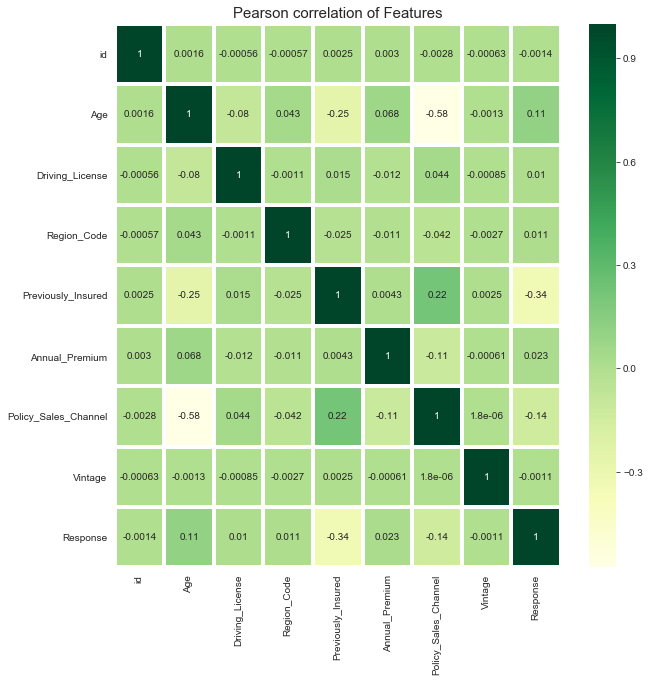

In [19]:
corr = data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')
plt.title("Pearson correlation of Features", y=1.05, size=15)

### Response ###

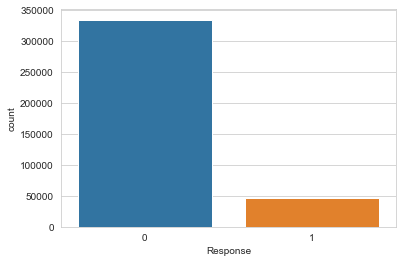

In [10]:
sns.set_style("whitegrid")
sns.countplot(data['Response'],data=data)

### Gender

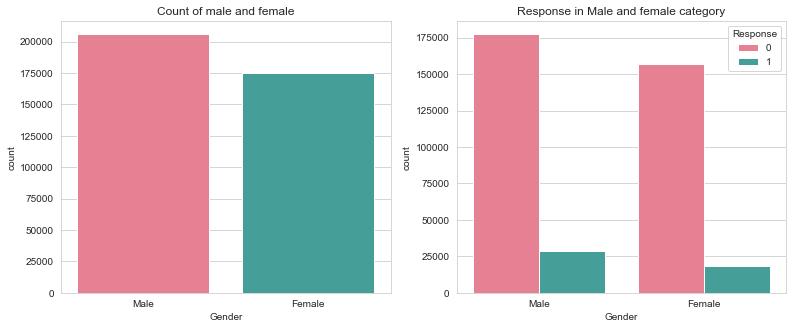

In [12]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='husl')
plt.title("Count of male and female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()

### Age v.s. Response

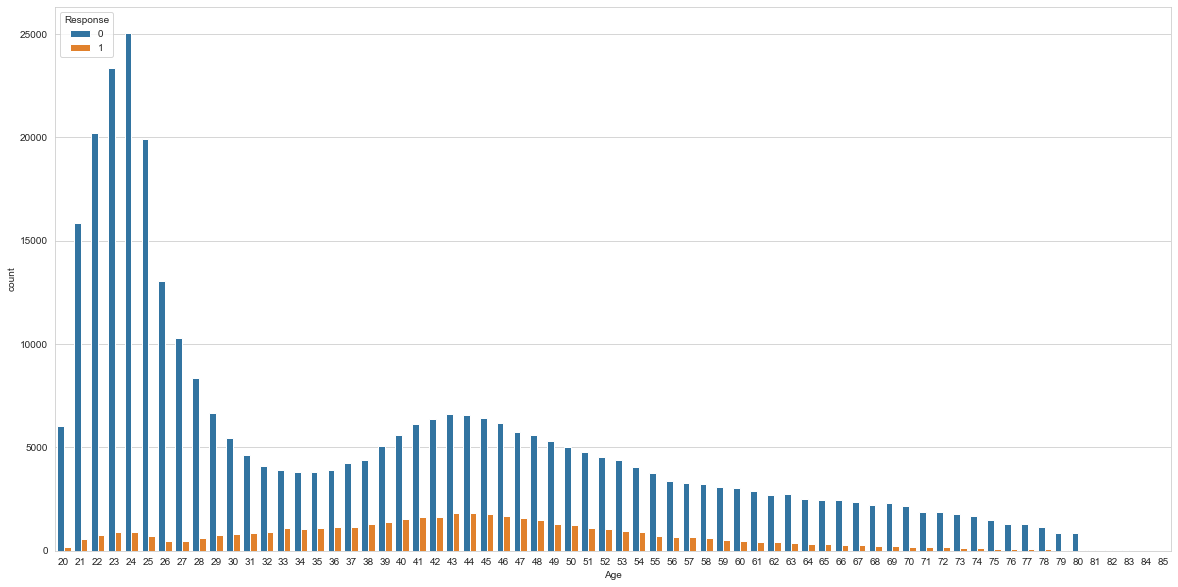

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=data)

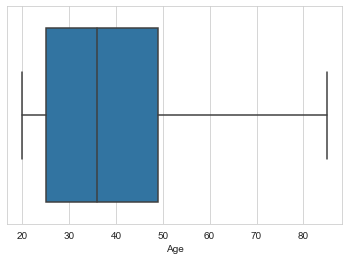

In [14]:
sns.boxplot(data['Age'])

### Driving License

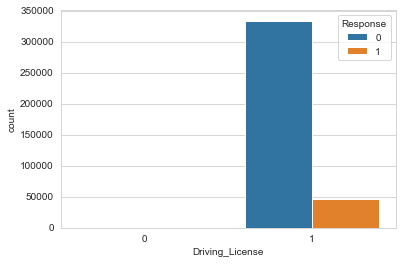

In [15]:
sns.countplot(data['Driving_License'],hue=data['Response'])

### Previously_Insured v.s. Response

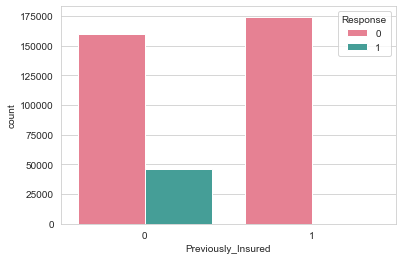

In [16]:
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='husl')

### Vehicle_Age v.s. Response

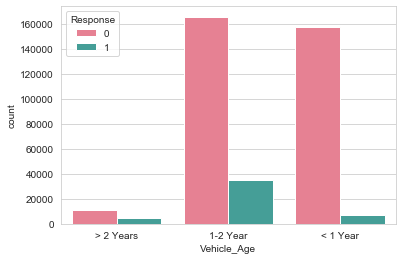

In [17]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='husl')

### Auunal_Premium

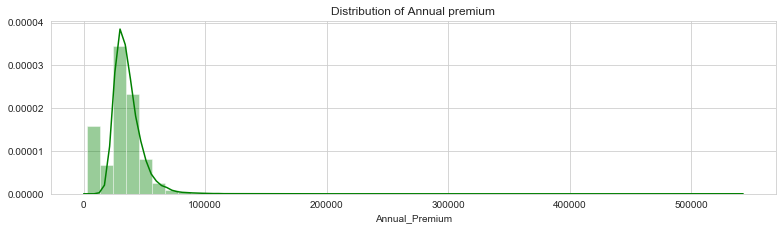

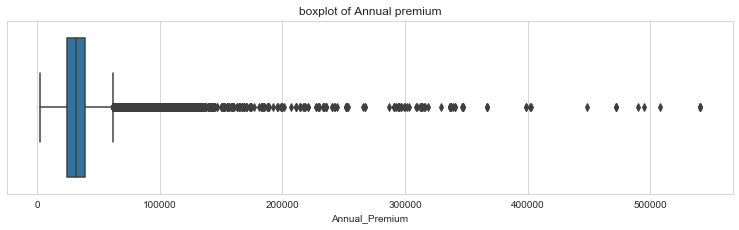

In [18]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

# 3. 데이터 전처리

### 범주형 변수를 수치형 변수로 encoding하기

In [4]:
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [7]:
data.dtypes 

id                        int64
Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

### 중복 열 제거하기

In [5]:
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []


### 반응변수와 설명변수 분리하기

In [6]:
x=data.drop(['Response'],axis=1) # 설명변수(반응변수만 제외)
y=data['Response']           # 반응변수

### 변수 선택

In [9]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class

[0.1927297  0.00528011 0.13976451 0.00048107 0.09493503 0.0532164
 0.01570074 0.07875956 0.16367354 0.06888927 0.18657007]


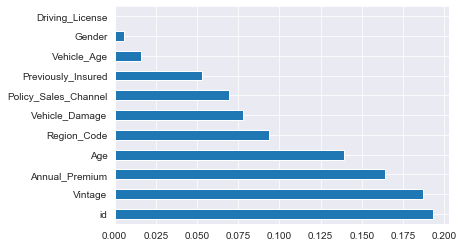

In [11]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [10]:
x=x.drop(['Driving_License','Gender'],axis=1) # 중요하지 않은 변수 제거

### 불균형 데이터 처리

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


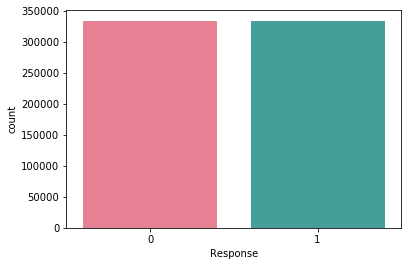

In [12]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_sample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')

### 데이터 쪼개기 - train/test data

In [13]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_new,y_new,test_size=.3,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)()

(468158, 9) (200640, 9) (468158,) (200640,)


### 데이터 스케일링

In [14]:
#feature scaling
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)

# 4. 로지스틱회귀모형 적합 (*)

## (1) 모형 적합

### 로지스틱 모형적합 결과 

In [30]:
### 로지스틱 모형적합 ###

model = LogisticRegression()
model = model.fit(xtrain, ytrain)
print(model.score(xtrain,ytrain)) # 학습세트의 정확도
print(model.score(xtest,ytest)) # 테스트세트의 정확도
print(model.coef_) # 회귀계수
print(model.intercept_) # 절편

0.7842373728527549
0.7833981259968102
[[-1.53864139e-03 -7.22444338e-02 -1.89597805e-03 -1.79253499e+00
  -1.15700561e-01  9.77837483e-01  2.42200499e-02 -1.98065698e-01
  -3.57633190e-03]]
[-0.84433993]


In [40]:
### 다른 방식의 로지스틱회귀분석 진행 ###
# cf. https://no17.tistory.com/202 
# cf. https://kiyoja07.blogspot.com/2019/03/python-logistic-regression.html
# cf. https://saintbeller96.tistory.com/17

import statsmodels.api as sm
logit = sm.Logit(ytrain,xtrain) #로지스틱 회귀분석 시행
result = logit.fit()
print(result.summary2()) # 결정계수가 너무 작은데?
print(np.exp(result.params)) # 오즈비
print(result.predict(xtrain))

Optimization terminated successfully.
         Current function value: 0.465787
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.328      
Dependent Variable: Response         AIC:              436141.9748
Date:               2020-11-25 16:57 BIC:              436241.4839
No. Observations:   468158           Log-Likelihood:   -2.1806e+05
Df Model:           8                LL-Null:          -3.2450e+05
Df Residuals:       468149           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.0020     0.0038     -0.5243   0.6001   -0.0094    0.0054
x2       -0.0848     0.0045    -18.9232   0.0

### 적합된 모형으로 예측

In [1]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability = model.predict_proba(xtest)[:,1]

NameError: name 'LogisticRegression' is not defined

## (2) 예측 

### 예측 결과

In [39]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability = model.predict_proba(xtest)[:,1]

In [40]:
acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)

print('Logistic regression Reports:\n', classification_report(pred,ytest))

Logistic regression Reports:
               precision    recall  f1-score   support

           0       0.59      0.96      0.73     61503
           1       0.98      0.70      0.82    139137

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



### 정확도와 ROC_AUC값 

In [19]:
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR) # AUC가 0.5에 가깔울수록 모델의 성능 좋지 못함

Accuracy :  0.7834778708133971
ROC_AUC Score: 0.8334102206343148


### ROC Curve

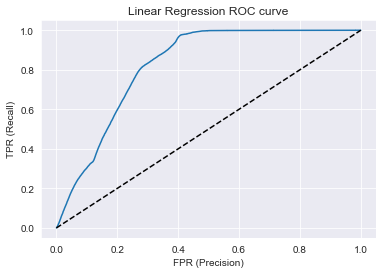

In [23]:
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

### Confusion matrix

[[59194 41134]
 [ 2309 98003]]


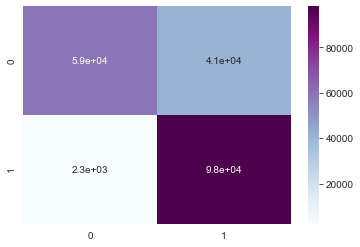

In [24]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')